<a href="https://colab.research.google.com/github/smvicky/pixel_test_submissions/blob/main/house_prices__advRegTech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install category_encoders

In [ ]:
import pandas as pd

train_raw = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
train_raw.head(), test.head()

In [ ]:
train_raw.isnull().sum().tail(40)

In [ ]:
# dropping these columns with most Null values
cols_to_remove = ["LotFrontage", "Alley","MasVnrType","FireplaceQu","PoolQC","Fence","MiscFeature"]
train_raw.drop(columns=cols_to_remove,axis = 1, inplace=True)
test.drop(columns=cols_to_remove,axis = 1, inplace=True)
train_raw.dropna(inplace=True)

In [ ]:
#adding new feature total_bath
train_raw['total_baths'] = train_raw['BsmtFullBath'] + train_raw['BsmtHalfBath'] + train_raw['FullBath'] + train_raw['HalfBath']
test['total_baths'] = test['BsmtFullBath'] + test['BsmtHalfBath'] + test['FullBath'] + test['HalfBath']

In [ ]:
traget = ["SalePrice"]
feature = train_raw.columns.drop(['SalePrice'])
y =train_raw[traget]
X = train_raw[feature]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val = train_test_split(X,train_size=0.8,random_state=2)
y_train,y_val = train_test_split(y,train_size=0.8,random_state=2)
X_train.shape,X_val.shape,y_train.shape,y_val.shape,

((1070, 74), (268, 74), (1070, 1), (268, 1))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='median'),
    LinearRegression()
    )


In [ ]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['MSZoning', 'Street', 'LotShape',
                                     'LandContour', 'Utilities', 'LotConfig',
                                     'LandSlope', 'Neighborhood', 'Condition1',
                                     'Condition2', 'BldgType', 'HouseStyle',
                                     'RoofStyle', 'RoofMatl', 'Exterior1st',
                                     'Exterior2nd', 'ExterQual', 'ExterCond',
                                     'Foundation', 'BsmtQual', 'BsmtCond',
                                     'BsmtExposure', 'BsmtFinType1',
                                     'BsmtFinType2', 'Heating', 'HeatingQC',
                                     'CentralAir', 'Electrical', 'KitchenQual',
                                     'Functional', ...],
                               use_cat_names=True)),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('linearregression', LinearRegression())])

In [ ]:
pipeline.predict(X_val)

array([[139555.98166922],
       [132261.45205167],
       [179278.21633664],
       [273851.34555077],
       [124484.63478285],
       [235722.32101655],
       [197650.22824235],
       [253274.8916363 ],
       [154206.58628356],
       [165908.93377157],
       [163295.70765981],
       [147972.98466188],
       [189323.88444834],
       [300509.85844886],
       [141576.77567688],
       [376986.34610379],
       [175551.46301557],
       [241109.94643013],
       [234554.52084368],
       [ 96853.29065954],
       [123226.42789553],
       [206276.81837215],
       [110270.20013485],
       [111207.11868107],
       [235638.66928001],
       [194932.95683573],
       [184796.88019535],
       [106111.44499881],
       [314236.38334379],
       [133940.90723798],
       [241817.47568201],
       [233912.65655847],
       [107818.07469745],
       [122252.96712414],
       [138287.50526335],
       [132395.03255468],
       [118260.74415055],
       [283147.96324988],
       [3001

In [ ]:
pipeline.score(X_val,y_val)

0.7300727616299325

In [ ]:
y_pred = pipeline.predict(test)

In [ ]:
y_pred = pd.DataFrame(y_pred, columns=['SalePrice'])

In [ ]:
def create_submission(test, y_pred):
  """
  Create a submission DataFrame from test DataFrame and y_pred DataFrame

  Args:
      test (pd.DataFrame): DataFrame containing the 'id' column
      y_pred (pd.DataFrame): DataFrame containing the 'SalesPrice' column

  Returns:
      pd.DataFrame: A new DataFrame with 'id' and 'SalesPrice' columns
  """
  # Concatenate DataFrames by row (inner join)
  submission = pd.concat([test[['Id']], y_pred[['SalePrice']]], axis=1)
  return submission

In [ ]:
submission = create_submission(test,y_pred)
submission = submission.set_index('Id',drop=True)

submission.to_csv("submission_sales_price.csv")

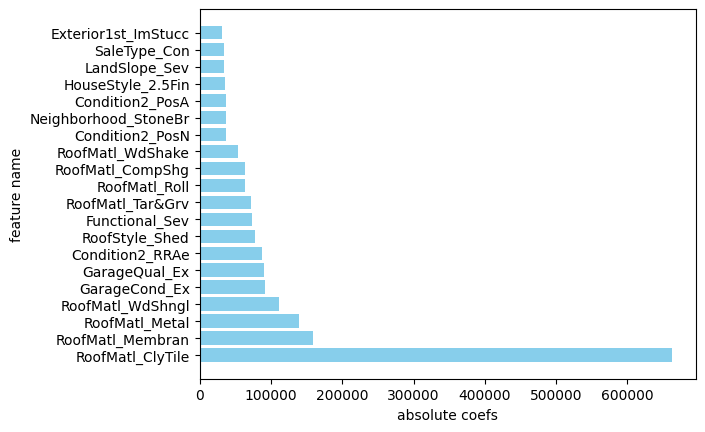

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
coefs = np.absolute(pipeline.named_steps.linearregression.coef_)
columns = pipeline.named_steps.onehotencoder.feature_names_out_

coef_series = pd.Series(coefs[0],columns)
data = coef_series.sort_values(ascending=False).head(20)
plt.xlabel("absolute coefs")
plt.ylabel("feature name")
plt.barh(data.index,data.values,color='skyblue')
plt.show()